In [1]:
import numpy as np 
import pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pnb = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/%20India%20Wilful%20Loan%20Defaulters/PNB.csv")

In [3]:
pnb.head()

,sctg,bknm,bkbr,state,srno,prty,regaddr,suit,other_bk,osamt
0,2.0,PUNJAB NATIONAL BANK,RAJAHMUNDRY,ANDHRA,1.0,G V V SATYANARAYANA,"VILLAGE KADIYAPULANKA KADIYAM MANDAL, EAST GOD...",SF,NaN,142.19
1,2.0,PUNJAB NATIONAL BANK,RAJAHMUNDRY,ANDHRA,2.0,SMT. G SUJATHA & SMT. G SUBBAYAMMA,"VILLAGE KADIYAPULANKA KADIYAM MANDAL, EAST GOD...",SF,NaN,111.73
2,2.0,PUNJAB NATIONAL BANK,GUNTUR,ANDHRA,3.0,SRI VISHNU TRADING CO,23.6.52 UPSTAIRS SRI RAM BHAVANPATNAM BAZAR GU...,SF,NaN,112.70
3,2.0,PUNJAB NATIONAL BANK,GUNTUR,ANDHRA,4.0,Spincot Textiles,"4-5-60/2/A, Saibaba Road, Guntur - 522007",SF,NaN,2670.41
4,2.0,PUNJAB NATIONAL BANK,"BHANGAGHAR, GUWAHATI",ASSAM,5.0,DOUBLE DEE CONSTRU PVT LTD,"4A,DIHANG ARCADE,NEAR RAJIB BHAWAN,GS ROAD,GUW...",SF,NaN,1417.30


In [4]:
pnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sctg      1124 non-null   float64
 1   bknm      1124 non-null   object 
 2   bkbr      1124 non-null   object 
 3   state     1124 non-null   object 
 4   srno      1124 non-null   float64
 5   prty      1124 non-null   object 
 6   regaddr   1123 non-null   object 
 7   suit      1124 non-null   object 
 8   other_bk  71 non-null     object 
 9   osamt     1124 non-null   float64
dtypes: float64(3), object(7)
memory usage: 87.9+ KB


In [5]:
print('Number of Records:',str(len(pnb)))
print('Total outstanding amount in  lac Rs (1 lac is 0.1 million)', round(pnb.osamt.sum(),2))
print('Number of states',len(pnb.state.unique()))
pnb.osamt.describe()

Number of Records: 1124
Total outstanding amount in  lac Rs (1 lac is 0.1 million) 2346960.72
Number of states 25


count      1124.000000
mean       2088.043345
std       16059.863090
min          25.000000
25%          57.167500
50%         182.545000
75%         890.637500
max      463351.880000
Name: osamt, dtype: float64

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


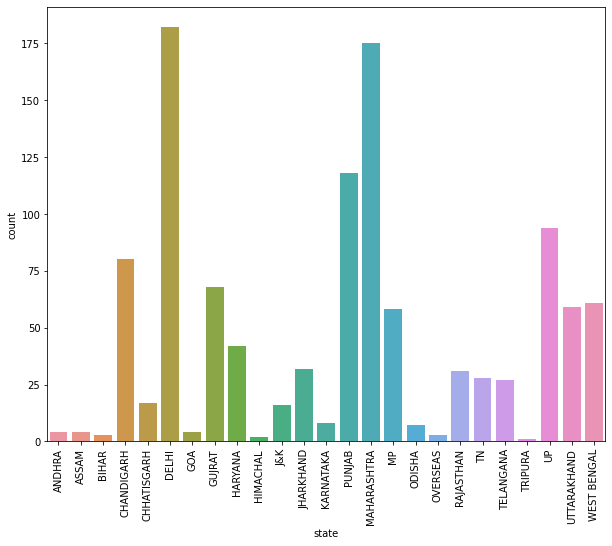

In [6]:
g = sns.countplot(pnb.state)
g.set_xticklabels(g.get_xticklabels(),rotation=90);
f = plt.gcf();
f.set_size_inches(10,8)

In [7]:
pnb2 = pnb.groupby('state')
pnb.groupby(['state','bkbr']).osamt.sum().reset_index().sort_values(by='osamt',ascending=False)

,state,bkbr,osamt
162,MAHARASHTRA,Brady house Mumbai,754721.79
172,MAHARASHTRA,LCB MUMBAI,189607.62
151,MAHARASHTRA,ARMB MUMBAI,137565.20
14,CHANDIGARH,LCB CHANDIGARH,130182.17
43,DELHI,ARMB DELHI CENTRAL,82235.11
...,...,...,...
357,UP,RAEBARELI,25.29
107,HARYANA,KHANDA KHERI,25.23
69,DELHI,"MOTI BAGH, NEW DELHI",25.21
341,UP,"KHANPUR, BULANDSHAHR",25.10


In [8]:
pnb_summary = pnb2.state.count().to_frame().join(pnb2.osamt.sum().to_frame())
pnb_summary.columns = ['CasesCount','TotalAmt']
pnb_summary.head()

,CasesCount,TotalAmt
state,,
ANDHRA,4,3037.03
ASSAM,4,1706.29
BIHAR,3,547.63
CHANDIGARH,80,173014.06
CHHATISGARH,17,7027.29


In [9]:
pnb_summary['logTotalAmt']=np.log10(pnb_summary.TotalAmt)
pnb_summary.describe()

,CasesCount,TotalAmt,logTotalAmt
count,25.00000,2.500000e+01,25.000000
mean,44.96000,9.387843e+04,4.191010
std,51.45992,2.455226e+05,0.966718
min,1.00000,1.119100e+02,2.048869
25%,4.00000,3.037030e+03,3.482449
50%,28.00000,2.394085e+04,4.379140
75%,61.00000,8.793204e+04,4.944147
max,182.00000,1.242273e+06,6.094217


In [10]:
pnb3 = pnb.groupby(['state','bkbr'])
pnb_branchwise = pnb3.bkbr.count().to_frame().join(pnb3.osamt.sum().to_frame())
pnb_branchwise.columns =['Branches','TotalAmt']

In [11]:
pnb_branchwise['AmtPerBranch']= round(pnb_branchwise.TotalAmt/pnb_branchwise.Branches,2)
pnb_branchwise.sort_values(by='AmtPerBranch', ascending=False).iloc[:5,:]['TotalAmt']

state        bkbr               
CHANDIGARH   LCB CHANDIGARH         130182.17
MAHARASHTRA  Brady house Mumbai     754721.79
             ARMB Nagpur             32103.54
             LCB MUMBAI             189607.62
TELANGANA    LCB CHENNAI             29608.00
Name: TotalAmt, dtype: float64

In [12]:
pnb_branchwise.iloc[pnb_branchwise.AmtPerBranch.values.argmax(),:]

Branches             1.00
TotalAmt        130182.17
AmtPerBranch    130182.17
Name: (CHANDIGARH, LCB CHANDIGARH), dtype: float64

In [13]:
pnb[(pnb['state'] =='MAHARASHTRA') & (pnb['bkbr'].str.contains('Brady'))]

,sctg,bknm,bkbr,state,srno,prty,regaddr,suit,other_bk,osamt
1070,2.0,PUNJAB NATIONAL BANK,"MCB Brady House,Mumbai",MAHARASHTRA,1071.0,Siddhi Vinayak Logistic Limited,"Plot No.14/15, Bhatpore, G.I.D.C., Hazira, Surat",SF,"Allahabad Bank,Andhra Bank,Bank of Baroda,Bank...",8745.69
1071,2.0,PUNJAB NATIONAL BANK,"MCB Brady House,Mumbai",MAHARASHTRA,1072.0,Shiv Parwati Sakhar Karkhana Ltd,"Sumati Krishna Niwas,Near Hotel Ameya,Shivsena...",SF,Andhra Bank and Punjab and Sindh Bank,5946.00
1117,2.0,PUNJAB NATIONAL BANK,Brady house Mumbai,MAHARASHTRA,1118.0,M/s Firestar International Ltd,"2nd Floor, Trade Point Building,Kamala Mills ...",SF,"Allahabad Bank,Andhra Bank, Axis Bank,Bank of ...",17860.03
1118,2.0,PUNJAB NATIONAL BANK,Brady house Mumbai,MAHARASHTRA,1119.0,M/s Firestar Diamonds International Pvt. Ltd,"Plot No. 118, Road No. 18, MIDC, Andheri East,...",SF,"Bank of Maharashtra ,United Bank of India,Unio...",4831.96
1119,2.0,PUNJAB NATIONAL BANK,Brady house Mumbai,MAHARASHTRA,1120.0,M/s Gitanjali Gems Ltd,"A-1, 7th Floor, Laxmi Tower, Bandra Kurla Comp...",SF,"Allahabad Bank, Andhra Bank,Bank of Baroda,Ban...",463351.88
1120,2.0,PUNJAB NATIONAL BANK,Brady house Mumbai,MAHARASHTRA,1121.0,M/s Gili India Limited,"Laxmi Tower, B Wing, Office No. 6, G Block...",SF,"Axis Bank,Canara Bank",144542.70
1121,2.0,PUNJAB NATIONAL BANK,Brady house Mumbai,MAHARASHTRA,1122.0,M/s Nakshatra Brands Ltd,"Laxmi Tower, B Wing, Office No. 6, G Block...",SF,"Bank of India,Canara Bank,Corporation Bank,ICI...",110874.02
1122,2.0,PUNJAB NATIONAL BANK,Brady house Mumbai,MAHARASHTRA,1123.0,M/s Asmi Jewellery India Ltd.,"Laxmi Tower, Office No. 6, B Wing, 1st Floor...",SF,"Corporation Bank,ICICI Bank,IDBI Bank,Axis Ban...",10177.05
1123,2.0,PUNJAB NATIONAL BANK,Brady house Mumbai,MAHARASHTRA,1124.0,M/s Chandri Paper & Allied Products Pvt. Ltd,"1. 4th Floor , Hafizian Building , 129/1...",SF,NO,3084.15


In [14]:
pnb_branchwise.sort_values(by='AmtPerBranch', ascending=False)

Branches   TotalAmt  AmtPerBranch
state       bkbr                                                   
CHANDIGARH  LCB CHANDIGARH               1  130182.17     130182.17
MAHARASHTRA Brady house Mumbai           7  754721.79     107817.40
            ARMB Nagpur                  1   32103.54      32103.54
            LCB MUMBAI                   6  189607.62      31601.27
TELANGANA   LCB CHENNAI                  1   29608.00      29608.00
...                                    ...        ...           ...
UP          RAEBARELI                    1      25.29         25.29
HARYANA     KHANDA KHERI                 1      25.23         25.23
DELHI       MOTI BAGH, NEW DELHI         1      25.21         25.21
UP          KHANPUR, BULANDSHAHR         1      25.10         25.10
HARYANA     BARSI GATE HANSI             1      25.00         25.00

[417 rows x 3 columns]

In [16]:
def AmountInNBranches(n):
    Total_top_N = pnb_branchwise.sort_values(by='AmtPerBranch', ascending=False).iloc[:n,:]['TotalAmt'].sum()
    GrandTotal = pnb_branchwise.sort_values(by='AmtPerBranch', ascending=False)['TotalAmt'].sum()
    return Total_top_N/GrandTotal

In [17]:
for i in range(1,10):
    print(i,round(AmountInNBranches(i),4))

1 0.0555
2 0.377
3 0.3907
4 0.4715
5 0.4841
6 0.5048
7 0.5334
8 0.5405
9 0.5582


In [18]:
pnb2.describe()

sctg                                                 srno  \
             count      mean       std  min  25%  50%  75%   max  count   
state                                                                     
ANDHRA         4.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0    4.0   
ASSAM          4.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0    4.0   
BIHAR          3.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0    3.0   
CHANDIGARH    80.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0   80.0   
CHHATISGARH   17.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0   17.0   
DELHI        182.0  2.175824  2.227867  2.0  2.0  2.0  2.0  32.0  182.0   
GOA            4.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0    4.0   
GUJRAT        68.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0   68.0   
HARYANA       42.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0   42.0   
HIMACHAL       2.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0    2.0   
J&K           16.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0   16.0   
JHARKHAND     32.0  3.687500  4.553889  2.0  2.0  2.0  2.0  17.0   32.0   
KARNATAKA      8.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0    8.0   
MAHARASHTRA  175.0  2.280000  1.412750  2.0  2.0  2.0  2.0  13.0  175.0   
MP            58.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0   58.0   
ODISHA         7.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0    7.0   
OVERSEAS       3.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0    3.0   
PUNJAB       118.0  4.915254  7.819083  2.0  2.0  2.0  2.0  31.0  118.0   
RAJASTHAN     31.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0   31.0   
TELANGANA     27.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0   27.0   
TN            28.0  2.321429  1.700840  2.0  2.0  2.0  2.0  11.0   28.0   
TRIPURA        1.0  2.000000       NaN  2.0  2.0  2.0  2.0   2.0    1.0   
UP            94.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0   94.0   
UTTARAKHAND   59.0  2.135593  1.041511  2.0  2.0  2.0  2.0  10.0   59.0   
WEST BENGAL   61.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0   61.0   

                          ...                   osamt                \
                    mean  ...      75%     max  count          mean   
state                     ...                                         
ANDHRA          2.500000  ...     3.25     4.0    4.0    759.257500   
ASSAM           6.500000  ...     7.25     8.0    4.0    426.572500   
BIHAR         740.666667  ...  1106.50  1107.0    3.0    182.543333   
CHANDIGARH     47.175000  ...    68.25    88.0   80.0   2162.675750   
CHHATISGARH    98.000000  ...   102.00   106.0   17.0    413.370000   
DELHI         214.879121  ...   242.75  1088.0  182.0   1011.241538   
GOA           286.500000  ...   287.25   288.0    4.0    406.230000   
GUJRAT        333.235294  ...   339.25  1086.0   68.0    533.474706   
HARYANA       376.500000  ...   386.75   397.0   42.0    570.020238   
HIMACHAL      398.500000  ...   398.75   399.0    2.0    249.225000   
J&K           407.500000  ...   411.25   415.0   16.0    320.680625   
JHARKHAND     431.500000  ...   439.25   447.0   32.0    557.089062   
KARNATAKA     696.125000  ...  1097.75  1116.0    8.0  10991.505000   
MAHARASHTRA   596.154286  ...   584.50  1124.0  175.0   7098.705257   
MP            658.896552  ...   651.75  1098.0   58.0    543.088103   
ODISHA        667.000000  ...   668.50   670.0    7.0    713.394286   
OVERSEAS      672.000000  ...   672.50   673.0    3.0   4429.200000   
PUNJAB        769.584746  ...   760.75  1117.0  118.0   1019.974661   
RAJASTHAN     800.806452  ...   798.50  1110.0   31.0     79.620000   
TELANGANA     844.000000  ...   850.50   857.0   27.0   3472.620000   
TN            846.642857  ...   826.25  1105.0   28.0   2233.046071   
TRIPURA       858.000000  ...   858.00   858.0    1.0    111.910000   
UP            910.000000  ...   928.75  1108.0   94.0    856.321596   
UTTARAKHAND   981.338983  ...   993.50  1077.0   59.0    584.499661

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


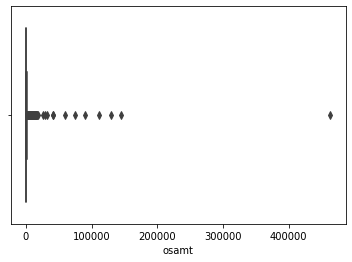

In [19]:
sns.boxplot(pnb['osamt'],orient='v');

<AxesSubplot:xlabel='state', ylabel='logTotalAmt'>

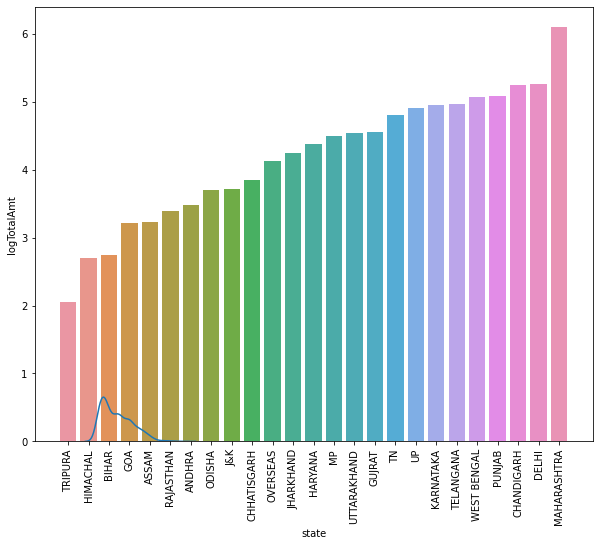

In [20]:
g =sns.barplot(x='state',y='logTotalAmt',data=pnb_summary.reset_index().sort_values(by='logTotalAmt'))
f = plt.gcf();
g.set_xticklabels(g.get_xticklabels(),rotation=90);
f.set_size_inches(10,8)

sns.kdeplot(np.log10(pnb['osamt']))